In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')

In [2]:
#Import the libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.utils import resample
from sklearn.manifold import TSNE
from sklearn import decomposition
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
rand_state=123
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas_profiling

In [3]:
telecom_cust = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
pandas_profiling.ProfileReport(telecom_cust)

In [6]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
#Removing missing values 
telecom_cust.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telecom_cust.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


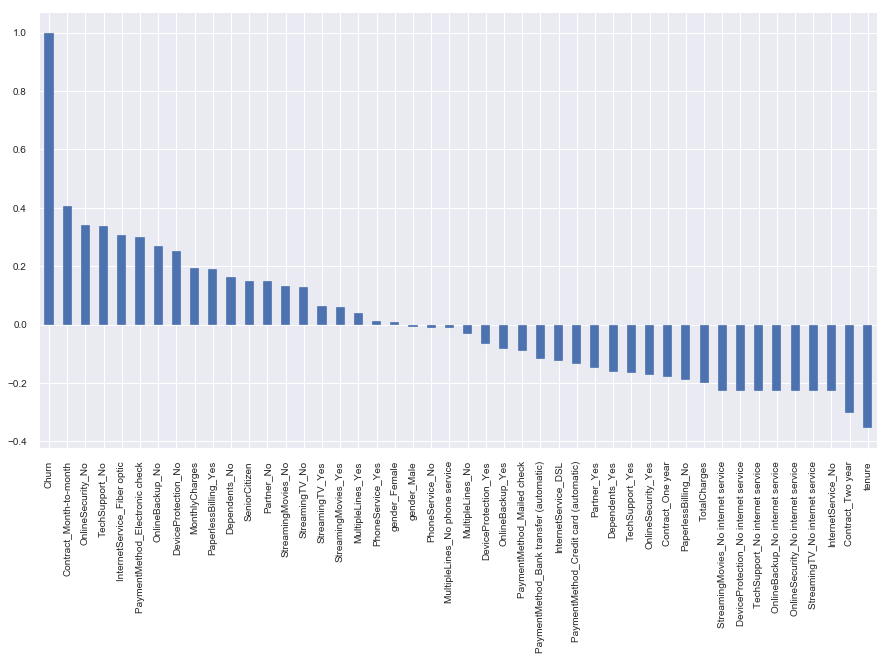

In [10]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar');

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

In [11]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [12]:
#This function is used to plot the ROC curve on both train and test.
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
def plot_roc_curve(classifier, X_train, y_train, X_test, y_test):
    from sklearn.metrics import roc_curve, auc
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    '''TEST DATA ROC CURVE'''
    #Use probability scores to compute the ROC Curve
    class_probabilities = classifier.predict_proba(X_test)
    y_probs = class_probabilities[:,1]
    fpr["Test"], tpr["Test"], threshold = roc_curve(y_test, y_probs)
    roc_auc["Test"] = auc(fpr["Test"], tpr["Test"])
    
    '''TRAIN DATA ROC CURVE'''
    #Use probability scores to compute the ROC Curve
    class_probabilities = classifier.predict_proba(X_train)
    y_probs = class_probabilities[:,1]
    fpr["Train"], tpr["Train"], threshold = roc_curve(y_train, y_probs)
    roc_auc["Train"] = auc(fpr["Train"], tpr["Train"])
    
    plt.figure(figsize=(10,7))
    linewidth = 2
    plt.plot(fpr["Test"], tpr["Test"], color='green', lw=linewidth, label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"])
    plt.plot(fpr["Train"], tpr["Train"], color='red', lw=linewidth, label='ROC curve Train Data (area = %0.2f)' % roc_auc["Train"])
    plt.plot([0, 1], [0, 1], color='navy', lw=linewidth, linestyle='--', label='Baseline ROC curve (area = 0.5)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [13]:
def model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels):
    
    #To store results at various phases during training as well as cross validation stages
    results = dict()
    model = rsearch_cv.best_estimator_
    
    #Time at which model starts training 
    train_start_time = dt.now()
    print('Training the model...')
    model.fit(X_train, y_train)
    print('Training completed... \n \n')
    train_end_time = dt.now()
    results['Training_Time'] =  train_end_time - train_start_time
    print('Training Time (HH:MM:SS.ms) -- {}\n\n'.format(results['Training_Time']))
    
    
    #Predict the test data
    print('Predicting test data...')
    test_start_time = dt.now()
    y_pred = model.predict(X_test)
    test_end_time = dt.now()
    print('Predicting test data completed... \n \n')
    results['Testing_Time'] = test_end_time - test_start_time
    print('Testing Time(HH:MM:SS:ms) -- {}\n\n'.format(results['Testing_Time']))
    results['Predicted'] = y_pred
   

    #Compute the F1 score 
    f1_score = metrics.f1_score(y_true=y_test, y_pred=y_pred, average='micro') #F1 = 2 * (precision * recall) / (precision + recall)
    
    #Store F1 Score in results
    results['F1_Score'] = f1_score
    print('---------------------')
    print('|      F1 Score      |')
    print('---------------------')
    print('\n    {}\n\n'.format(f1_score))      
    

    #Calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
        
    #Store the accuracy in results
    results['Accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    #Calculate overall recall_score of the model
    recall = metrics.recall_score(y_true=y_test, y_pred=y_pred)
        
    #Store the accuracy in results
    results['Recall'] = recall
    print('---------------------')
    print('|      Recall        |')
    print('---------------------')
    print('\n    {}\n\n'.format(recall))
    
    #Calculate overall roc-auc of the model
    #Calibrate the model
    sig_clf = CalibratedClassifierCV(model, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    class_probabilities = sig_clf.predict_proba(X_test)
    y_probs = class_probabilities[:,1]
    roc_auc = metrics.roc_auc_score(y_true=y_test, y_score=y_probs)
        
    #Store the ROC-AUC in results
    results['ROC-AUC'] = roc_auc
    print('---------------------')
    print('|      ROC AUC       |')
    print('---------------------')
    print('\n    {}\n\n'.format(roc_auc))   
                   
    #Display the classification report having individual class recalls and precision values.
    print('-------------------------')
    print('| Classifiction Report  |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    
    #Store report in results
    results['Classification_Report'] = classification_report
    print(classification_report)
    
    #Add the trained  model to the results
    results['Model'] = model
    
    #Plot the confusion matrix curve
    plot_confusion_matrix(y_test, y_pred)
    
    return results, model

In [14]:
def print_grid_search_attributes(model):
    #Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))

    #Parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))

    #Number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))

    #Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

In [15]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn']
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [16]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4922, 45)
Number transactions y_train dataset:  (4922,)
Number transactions X_test dataset:  (2110, 45)
Number transactions y_test dataset:  (2110,)


Shape of the Data Matrix before reducing dimension:  (4922, 45)
Shape of the Data Matrix after reducing dimension:  (4922, 2)


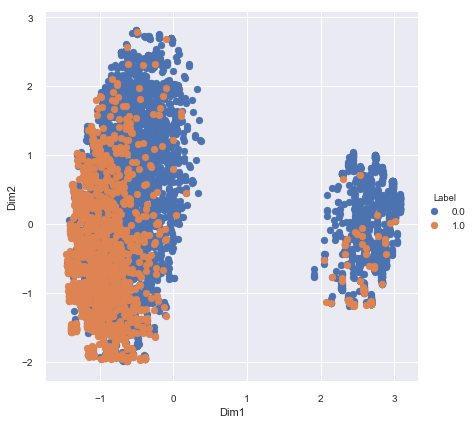

In [18]:
#Initialize the PCA
from sklearn import decomposition
pca = decomposition.PCA()

#Configure the parameteres: Number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(X_train)

#pca_data will contain the 2-D projections of X_train
print("Shape of the Data Matrix before reducing dimension: ",X_train.shape)
print("Shape of the Data Matrix after reducing dimension: ",pca_data.shape)

#Attaching the label for each 2D data point. 
pca_data = np.vstack((pca_data.T, y_train)).T

#Creating a new dataframe which help us in ploting the result data. The new dataframe contains the reduced dimension of X_train along with the class label.
pca_df = pd.DataFrame(data=pca_data, columns=("Dim1", "Dim2", "Label"))
sns.FacetGrid(pca_df, hue="Label", height=6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()

In [19]:
from sklearn.manifold import TSNE
def tsne(dataset, labels, perplexity):
    labels=labels.apply(lambda x: 'Churn' if x==1 else 'No Churn')    
    #Starting TSNE dataset transform
    model = TSNE(n_components=2, init='random', random_state=1230, verbose=1, angle=0.5, method='barnes_hut', perplexity=perplexity, n_iter=2000)
    tsne_data = model.fit_transform(dataset)

    #Creating a new data frame which help us in ploting the result data
    tsne_data = np.vstack((tsne_data.T, labels)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension 1", "Dimension 2", "Label Type"))
    
    #Info
    print("\nT-SNE Plot for perplexity = {}".format(perplexity))
    
    # Ploting the result of tsne
    sns.FacetGrid(tsne_df, hue="Label Type", height=6).map(plt.scatter, 'Dimension 1', 'Dimension 2').add_legend()
    plt.show()

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 4922 samples in 0.073s...
[t-SNE] Computed neighbors for 4922 samples in 3.958s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4922
[t-SNE] Computed conditional probabilities for sample 2000 / 4922
[t-SNE] Computed conditional probabilities for sample 3000 / 4922
[t-SNE] Computed conditional probabilities for sample 4000 / 4922
[t-SNE] Computed conditional probabilities for sample 4922 / 4922
[t-SNE] Mean sigma: 1.090792
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.282440
[t-SNE] KL divergence after 2000 iterations: 1.419807

T-SNE Plot for perplexity = 100


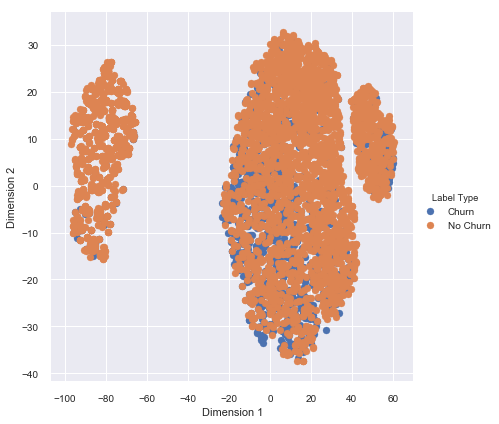

Time taken to complete random search:  0:05:42.423640


In [20]:
st=dt.now()
tsne(X_train, y_train, 100)
print("Time taken to complete random search: ",dt.now()-st)

[t-SNE] Computing 451 nearest neighbors...
[t-SNE] Indexed 4922 samples in 0.078s...
[t-SNE] Computed neighbors for 4922 samples in 4.595s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4922
[t-SNE] Computed conditional probabilities for sample 2000 / 4922
[t-SNE] Computed conditional probabilities for sample 3000 / 4922
[t-SNE] Computed conditional probabilities for sample 4000 / 4922
[t-SNE] Computed conditional probabilities for sample 4922 / 4922
[t-SNE] Mean sigma: 1.151642
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.344757
[t-SNE] KL divergence after 2000 iterations: 1.323715

T-SNE Plot for perplexity = 150


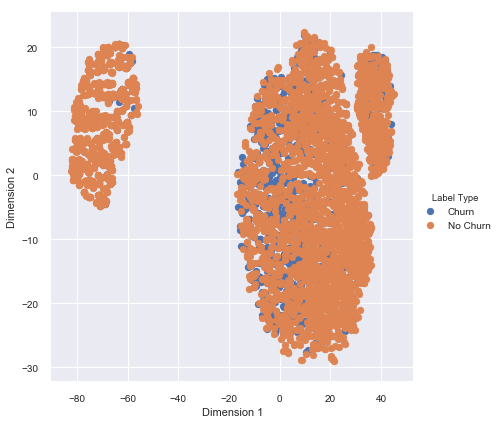

Time taken to complete random search:  0:07:05.742729


In [21]:
st=dt.now()
tsne(X_train, y_train, 150)
print("Time taken to complete random search: ",dt.now()-st)

#### Model Building

1. Logistic Regression

In [22]:
st=dt.now()
params = {'C': np.logspace(-4,3,50),
                     'penalty': ['l1','l2'] } #C values used for cross validation

model = LogisticRegression(n_jobs=-1, random_state=rand_state,class_weight='balanced')
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=params, 
                                cv=3, scoring='roc_auc',
                                verbose=2,
                                n_jobs=-1,
                                random_state=rand_state)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Time taken to complete random search:  0:00:12.466846


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.2s finished


In [23]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=51.79474679231202, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'penalty': 'l2', 'C': 51.79474679231202}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8483746330987356



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.160907


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.002000


---------------------
|      F1 Score      |
---------------------

    0.7454976303317534


---------------------
|      Accuracy      |
---------------------

    0.7454976303317535


---------------------
|      Recall        |
---------------------

    0.769811320754717


---------------------
|      ROC AUC       |
---------------------

    0.8345671124910438


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1580
           1       0.50      0.77      0.60       530

    accuracy                           0.75      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.80      0.75      0.76      2110



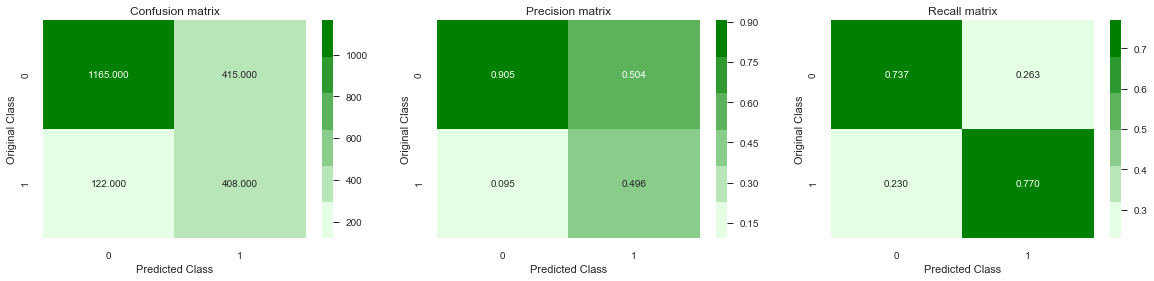

In [24]:
logit_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

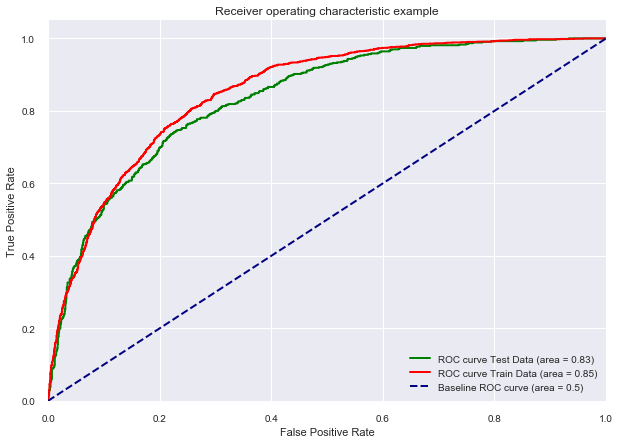

In [25]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

AxesSubplot(0.125,0.125;0.775x0.755)


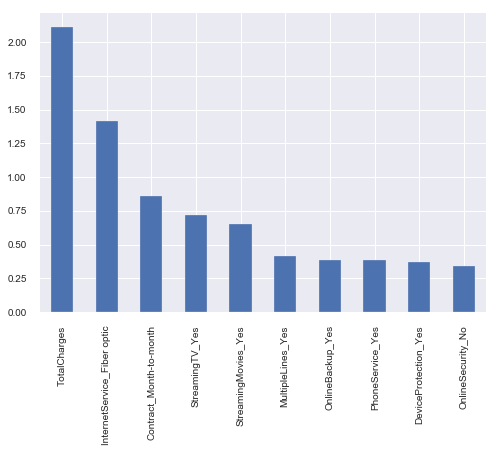

In [26]:
# To get the weights of all the variables
weights = pd.Series(trained_model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


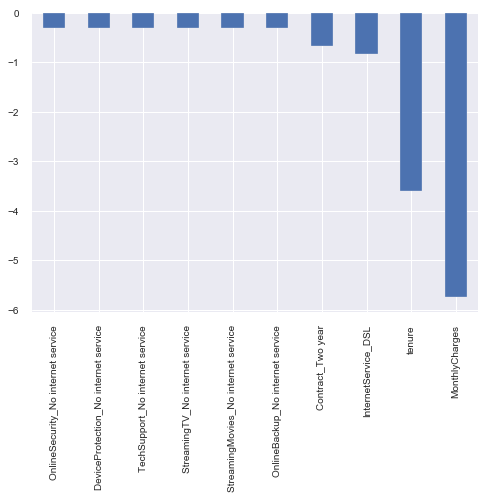

In [27]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

Observations

We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:

As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
Having DSL internet service also reduces the proability of Churn
Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. I think we need to explore more to better understad why this is happening.

#### 2. random Forest

In [28]:
st=dt.now()
tuned_parameters = {'max_depth':[3,4,5,6,7,8,9,10],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5,7,9], 
                    'min_samples_leaf':[1, 10, 25, 50, 75, 100],
                    'n_estimators':[10,20,30,40,50,60,80,100,500,1000],
                    'max_leaf_nodes':[None, 10, 25, 50, 100, 500]}

model = RandomForestClassifier(random_state=rand_state,class_weight='balanced')
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=rand_state)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.8s finished


Time taken to complete random search:  0:00:16.383601


In [29]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=50, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=3, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_estimators': 1000, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_leaf_nodes': 50, 'max_depth': 9, 'criterion': 'entropy'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

----------------------

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:05.738704


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.484739


---------------------
|      F1 Score      |
---------------------

    0.75260663507109


---------------------
|      Accuracy      |
---------------------

    0.75260663507109


---------------------
|      Recall        |
---------------------

    0.7490566037735849


---------------------
|      ROC AUC       |
---------------------

    0.837120253164557


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1580
           1       0.51      0.75      0.60       530

    accuracy                           0.75      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.80      0.75      0.77      2110



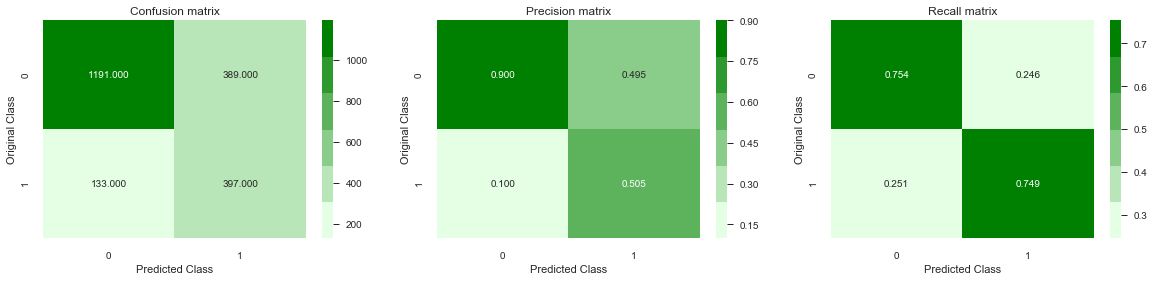

In [30]:
rf_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

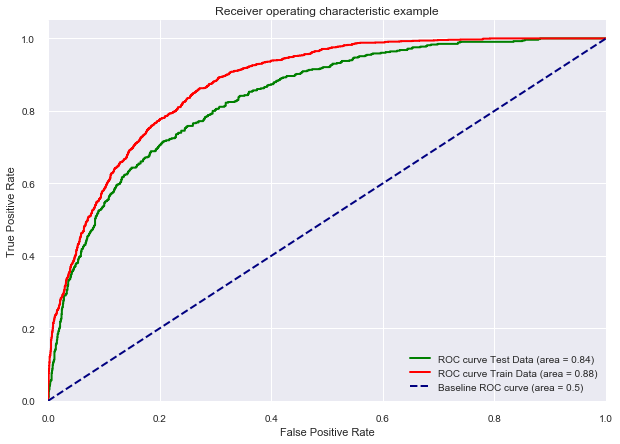

In [31]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

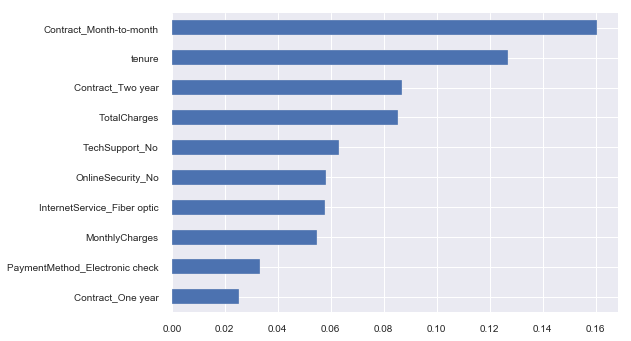

In [32]:
importances = trained_model.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

Observations:

From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn.
The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

#### 3. xgBoost

In [33]:
from xgboost import XGBClassifier

st=dt.now()
tuned_parameters = {'learning_rate':[0.1,0.01,0.001,0.0001],
                    'n_estimators':[10,25,50,100,250,500,650,750,850,1000,1500,2000,3000],
                    'subsample':[0.6,0.7,0.8],
                    'min_child_weight':[3,5,7,9],
                    'max_depth': [3,4,5,6,7,9,11,13,15,17,20,25,50],
                    'colsample_bytree':[0.6,0.7,0.8],
                    'gamma':[0,0.25,0.4,0.5,0.55,0.7,1]}

model = XGBClassifier(random_state=1230)

rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=10, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=1230)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 23.5min finished


Time taken to complete random search:  0:24:45.434281


In [34]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.55,
              learning_rate=0.0001, max_delta_step=0, max_depth=50,
              min_child_weight=9, missing=None, n_estimators=1500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1230,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'subsample': 0.8, 'n_estimators': 1500, 'min_child_weight': 9, 'max_depth': 50, 'learning_rate': 0.0001, 'gamma': 0.55, 'colsample_bytree': 0.6}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 10

-------------------

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:43.695932


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.410762


---------------------
|      F1 Score      |
---------------------

    0.8109004739336493


---------------------
|      Accuracy      |
---------------------

    0.8109004739336493


---------------------
|      Recall        |
---------------------

    0.5037735849056604


---------------------
|      ROC AUC       |
---------------------

    0.8372068306663483


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1580
           1       0.66      0.50      0.57       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



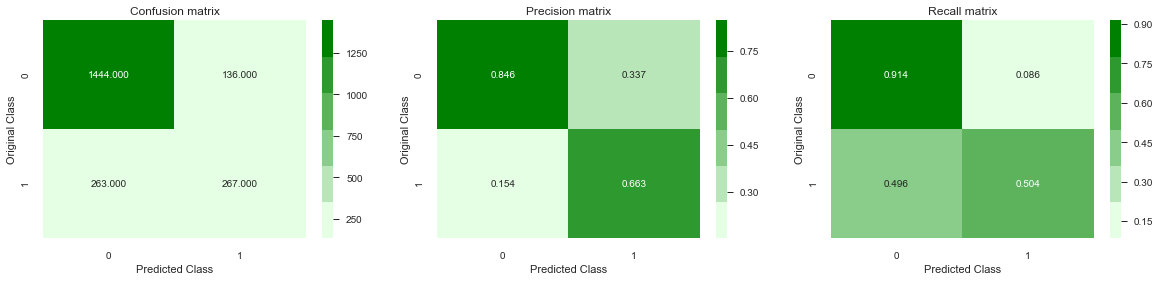

In [35]:
xg_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

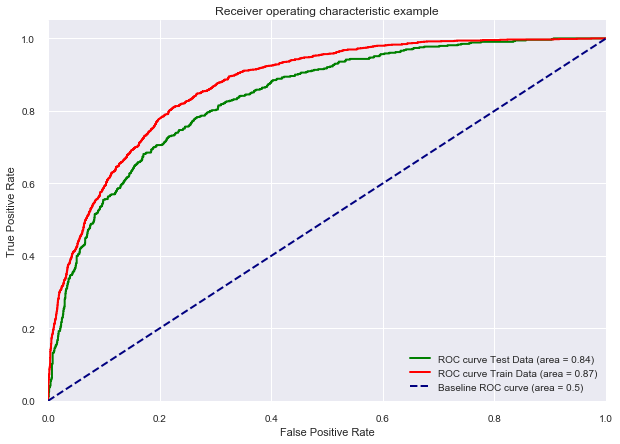

In [36]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

#### 4. AdaBoost

In [37]:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
st=dt.now()
params = {'learning_rate': [0.001,0.01,0.1],
                     'n_estimators': [100,200,300,400,500,600] } #C values used for cross validation

model = AdaBoostClassifier( random_state=1230)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=params, 
                                cv=3, scoring='roc_auc',
                                verbose=2,n_jobs=-1,
                                random_state=1230)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   48.9s finished


Time taken to complete random search:  0:00:50.856836


In [39]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=200, random_state=1230)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_estimators': 200, 'learning_rate': 0.1}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8492735661015296



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:01.877923


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.183896


---------------------
|      F1 Score      |
---------------------

    0.8113744075829384


---------------------
|      Accuracy      |
---------------------

    0.8113744075829384


---------------------
|      Recall        |
---------------------

    0.539622641509434


---------------------
|      ROC AUC       |
---------------------

    0.8389031526152375


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1580
           1       0.65      0.54      0.59       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.81      2110



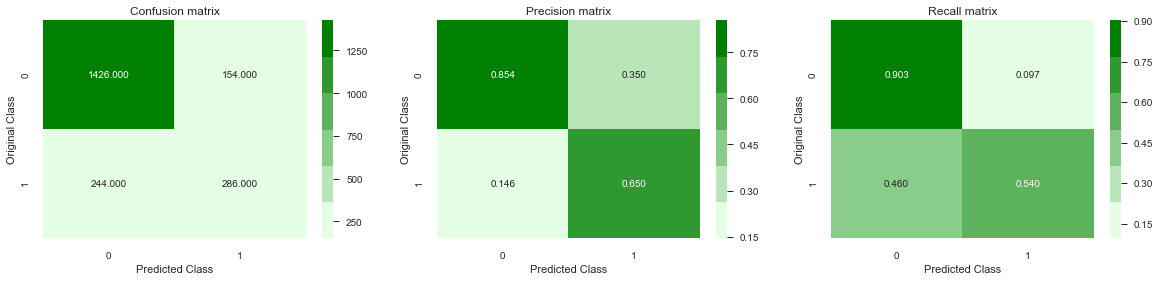

In [41]:
ada_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

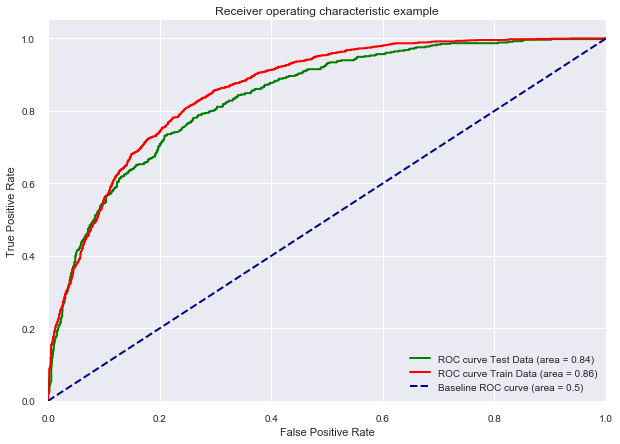

In [42]:
#Calibrate the model
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

#### 5.AdaBoosting + Random Forest

In [47]:
st=dt.now()
params = {'learning_rate': [0.001,0.01,0.1],
                     'n_estimators': [100,200,300,400,500,600] } #C values used for cross validation

model = AdaBoostClassifier( RandomForestClassifier(class_weight={0:1,1:5}))
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=params, 
                                cv=3, scoring='roc_auc',
                                verbose=2,n_jobs=-1,
                                random_state=1230)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.3min finished


Time taken to complete random search:  0:10:15.756783


In [48]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight={0: 1,
                                                                       1: 5},
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                       

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:58.962169


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:04.817256


---------------------
|      F1 Score      |
---------------------

    0.79478672985782


---------------------
|      Accuracy      |
---------------------

    0.79478672985782


---------------------
|      Recall        |
---------------------

    0.4867924528301887


---------------------
|      ROC AUC       |
---------------------

    0.8255081203725818


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1580
           1       0.62      0.49      0.54       530

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.79      2110



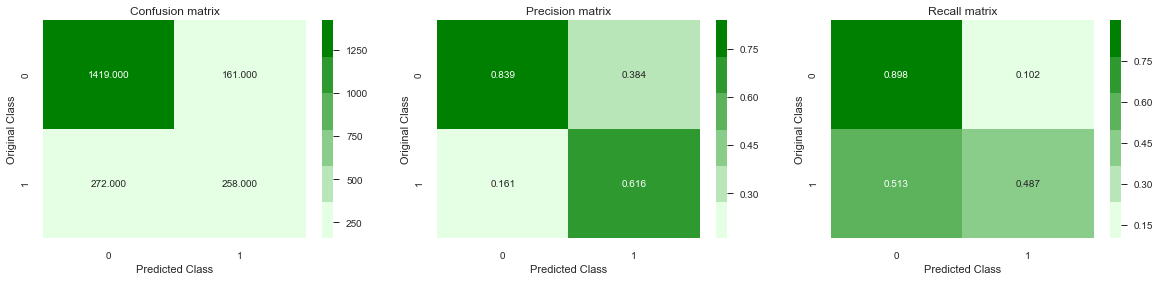

In [49]:
ada_rf_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

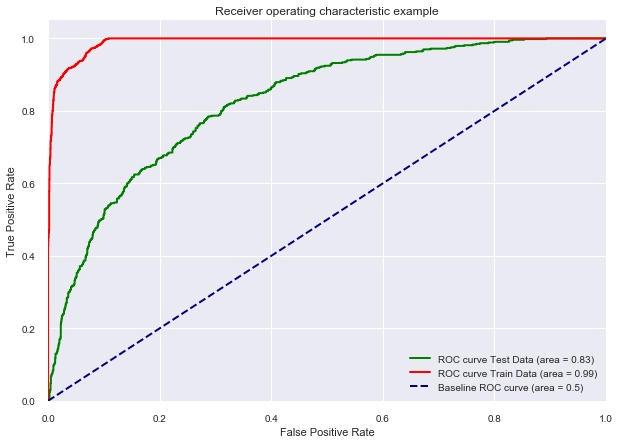

In [50]:
#Calibrate the model
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

#### 6. KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

st=dt.now()

tuned_parameters = {'n_neighbors': [3,5,7,9,11,13,15],
                    'weights': ['uniform','distance'],
                    'algorithm': ['ball_tree','kd_tree','brute'] }

model = KNeighborsClassifier(n_jobs=-1, p=2, metric='minkowski')

rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=1230)

rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s


Time taken to complete random search:  0:00:07.992415


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.8s finished


In [44]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
                     weights='uniform')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'weights': 'uniform', 'n_neighbors': 15, 'algorithm': 'ball_tree'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8179250218364954



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.055967


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.628874


---------------------
|      F1 Score      |
---------------------

    0.7777251184834123


---------------------
|      Accuracy      |
---------------------

    0.7777251184834123


---------------------
|      Recall        |
---------------------

    0.5433962264150943


---------------------
|      ROC AUC       |
---------------------

    0.8164539049438739


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1580
           1       0.56      0.54      0.55       530

    accuracy                           0.78      2110
   macro avg       0.70      0.70      0.70      2110
weighted avg       0.78      0.78      0.78      2110



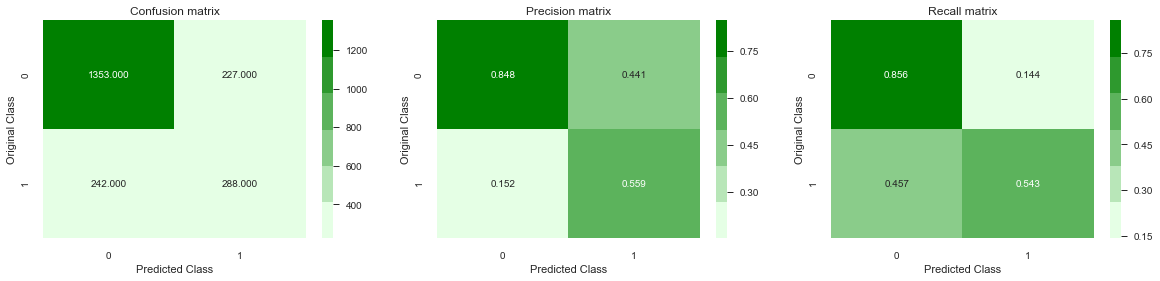

In [45]:
knn_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

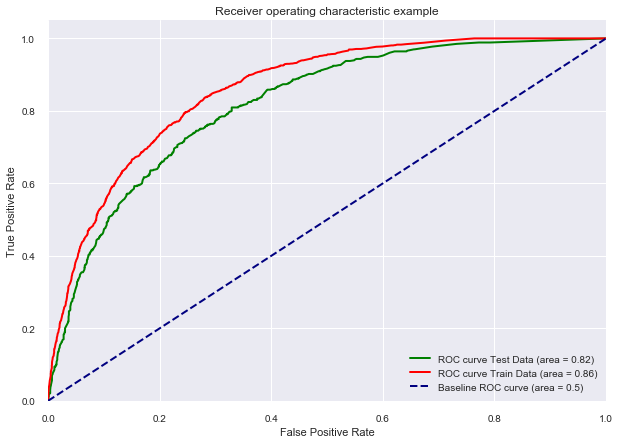

In [46]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

#### 7. Naive Bayes

In [51]:
from sklearn.naive_bayes import MultinomialNB

In [52]:
st=dt.now()
alps = []
i = 1.0e-5
while(i<=1000):
    alps.append(np.round(i,10))
    i *= 5
params = {'alpha': alps } #C values used for cross validation

model = MultinomialNB()
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=params, 
                                cv=10, scoring='roc_auc',
                                verbose=2,
                                n_jobs=-1,
                                random_state=1230)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.6s


Time taken to complete random search:  0:00:12.088091


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.9s finished


In [53]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	MultinomialNB(alpha=0.15625, class_prior=None, fit_prior=True)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'alpha': 0.15625}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 10

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8212123111694138



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.035975


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.005996


---------------------
|      F1 Score      |
---------------------

    0.70521327014218


---------------------
|      Accuracy      |
---------------------

    0.70521327014218


---------------------
|      Recall        |
---------------------

    0.7754716981132076


---------------------
|      ROC AUC       |
---------------------

    0.8052119656078337


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.90      0.68      0.78      1580
           1       0.45      0.78      0.57       530

    accuracy                           0.71      2110
   macro avg       0.68      0.73      0.67      2110
weighted avg       0.79      0.71      0.72      2110



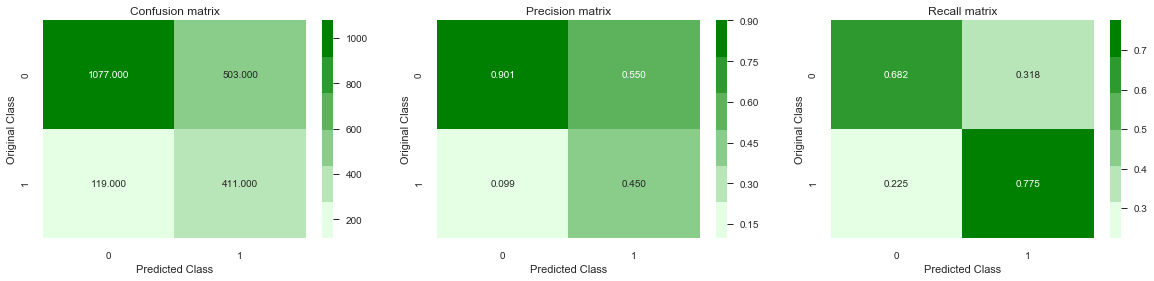

In [54]:
mn_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

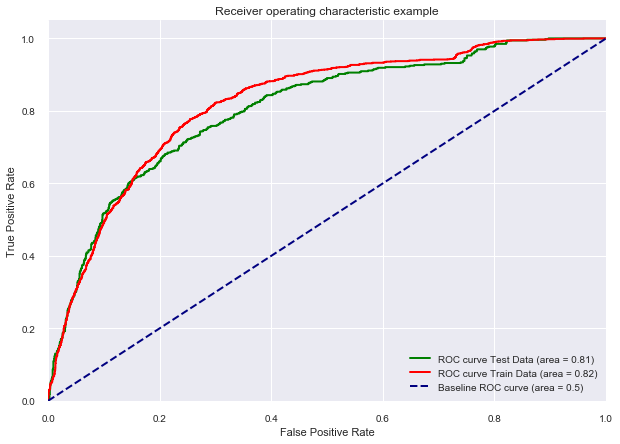

In [55]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

#### 8. Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
st=dt.now()
params = {'max_depth': np.arange(2,30,2),
                    'criterion': ['gini','entropy'],
                    'min_samples_split': np.arange(0.1,1.0,0.1),
                    'min_samples_leaf' : np.arange(1,10,1),
                    'min_weight_fraction_leaf' : [0.0,0.1,0.2,0.3,0.4]} 

model = DecisionTreeClassifier(random_state=1230,class_weight='balanced')
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=params, 
                                cv=10, scoring='roc_auc',
                                verbose=1,
                                n_jobs=-1,
                                random_state=1230)

rsearch_cv.fit(X_train, y_train)
print("Time taken to complete random search: ",dt.now()-st)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    5.4s


Time taken to complete random search:  0:00:06.279394


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.1s finished


In [57]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=24, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1230, splitter='best')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'min_weight_fraction_leaf': 0.0, 'min_samples_split': 0.1, 'min_samples_leaf': 8, 'max_depth': 24, 'criterion': 'entropy'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 10

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate score

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.043955


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.002998


---------------------
|      F1 Score      |
---------------------

    0.7175355450236967


---------------------
|      Accuracy      |
---------------------

    0.7175355450236967


---------------------
|      Recall        |
---------------------

    0.7962264150943397


---------------------
|      ROC AUC       |
---------------------

    0.8256526152376403


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1580
           1       0.46      0.80      0.59       530

    accuracy                           0.72      2110
   macro avg       0.69      0.74      0.69      2110
weighted avg       0.80      0.72      0.74      2110



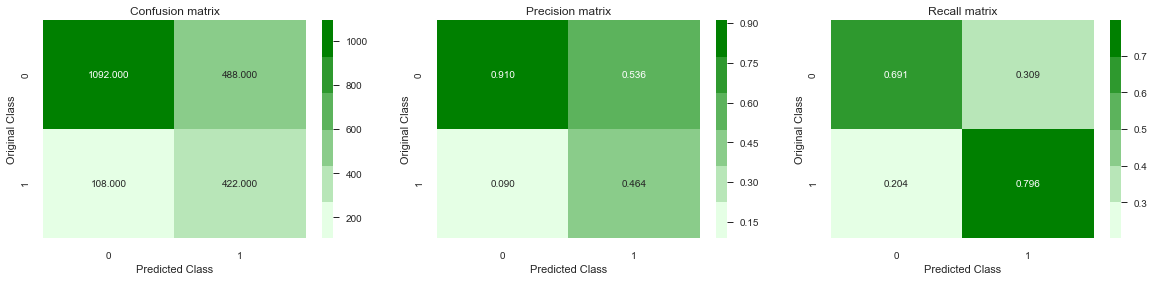

In [58]:
dt_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

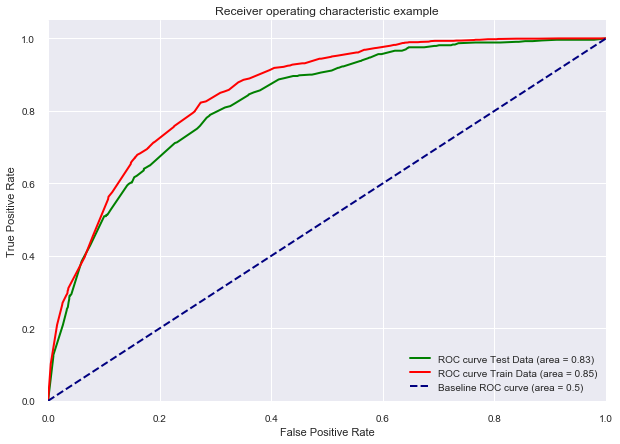

In [59]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

#### 9.GBDT

In [60]:
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
st=dt.now()
params = {'learning_rate': [0.001,0.01,0.1],
                     'n_estimators': [100,200,300,400,500,600] ,
                       'max_depth': [3,4,5,6,7]} #C values used for cross validation

model = GradientBoostingClassifier( random_state=1230)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=params, 
                                cv=3, scoring='roc_auc',
                                verbose=2,n_jobs=-1,
                                random_state=1230)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.1min finished


Time taken to complete random search:  0:02:11.337622


In [62]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=1230, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.01}

---------------------------------
|   No of CrossValidation

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:06.258408


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.037979


---------------------
|      F1 Score      |
---------------------

    0.8090047393364929


---------------------
|      Accuracy      |
---------------------

    0.8090047393364929


---------------------
|      Recall        |
---------------------

    0.5094339622641509


---------------------
|      ROC AUC       |
---------------------

    0.840062096966802


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1580
           1       0.65      0.51      0.57       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.80      0.81      0.80      2110



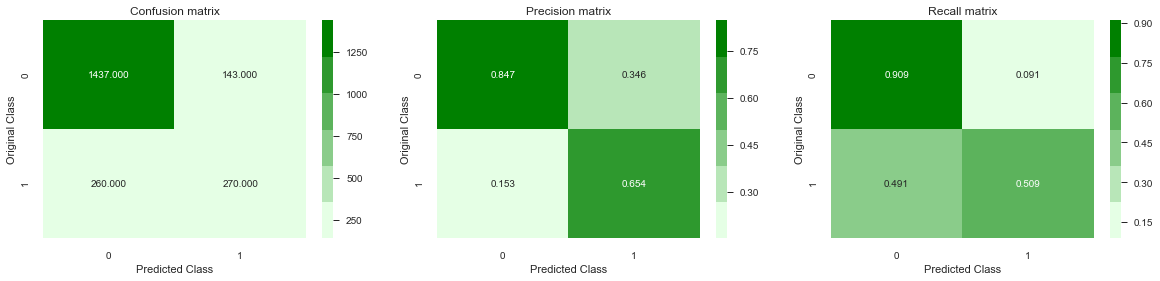

In [63]:
gbdt_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

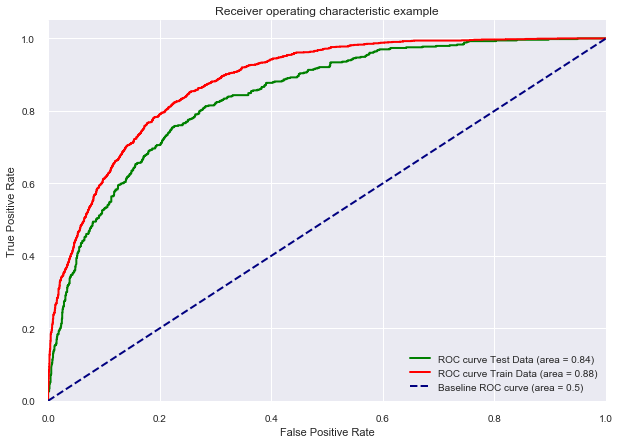

In [64]:
#Calibrate the model
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

#### Conclusion:-

In [65]:
from prettytable import PrettyTable
model=['Logistic','Random Forest','xgBoost','AdaBoost','AdaBoost+RF','KNN','Naive B','Decision tree','GBDT']
Train_AUC = [0.85,0.88,0.87,0.86,0.99,0.86,0.82,0.85,0.88]
Test_AUC = [0.83,0.84,0.84,0.84,0.83,0.82,0.81,0.83,0.84]
Accuracy = [0.745,0.752,0.81,0.814,0.794,0.791,0.705,0.717,0.809]

In [66]:
# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("Model",model)
ptable.add_column("AUC(Train)",Train_AUC)
ptable.add_column("AUC(Test)",Test_AUC)
ptable.add_column("Accuracy",Accuracy)
# Printing the Table
print(ptable)

+---------------+------------+-----------+----------+
|     Model     | AUC(Train) | AUC(Test) | Accuracy |
+---------------+------------+-----------+----------+
|    Logistic   |    0.85    |    0.83   |  0.745   |
| Random Forest |    0.88    |    0.84   |  0.752   |
|    xgBoost    |    0.87    |    0.84   |   0.81   |
|    AdaBoost   |    0.86    |    0.84   |  0.814   |
|  AdaBoost+RF  |    0.99    |    0.83   |  0.794   |
|      KNN      |    0.86    |    0.82   |  0.791   |
|    Naive B    |    0.82    |    0.81   |  0.705   |
| Decision tree |    0.85    |    0.83   |  0.717   |
|      GBDT     |    0.88    |    0.84   |  0.809   |
+---------------+------------+-----------+----------+


##### Clearly, xgBoost and adaBoost is the winner